# Analyzing Restaurant Tips

Loading Data

In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [9]:
tips_data=pd.read_csvd("tips_data.csv")

AttributeError: module 'pandas' has no attribute 'read_csvd'

In [10]:
tips_df = pd.read_csv('tips_data.csv')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [14]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [16]:
tips_df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [17]:
tips_df.shape

(244, 7)

In [18]:
tips_df.all

<bound method DataFrame.all of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [19]:
tips_df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [20]:
tips_df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Do smoker people give more tips?

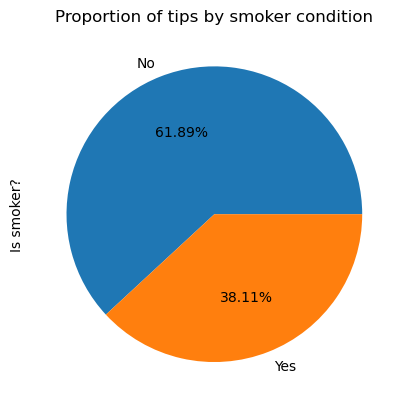

In [21]:
smokers_count = tips_df['smoker'].value_counts()

tips_by_smokers_chart = smokers_count.plot(kind="pie",
                                           label="Is smoker?",
                                           title="Proportion of tips by smoker condition",
                                           autopct='%1.2f%%')

Do men or women give more tips?

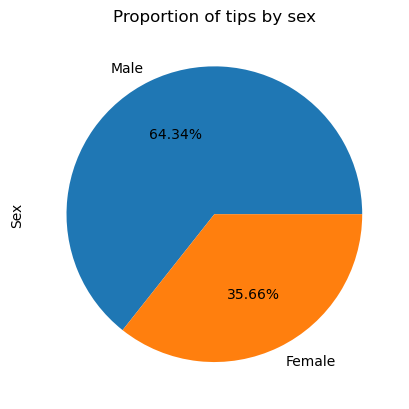

In [22]:
tips_by_sex_count = tips_df['sex'].value_counts()

sex_proportion_chart = tips_by_sex_count.plot(kind="pie",
                                              label="Sex",
                                              title="Proportion of tips by sex",
                                              autopct='%1.2f%%')

### Total bill and Tips amounts by sex

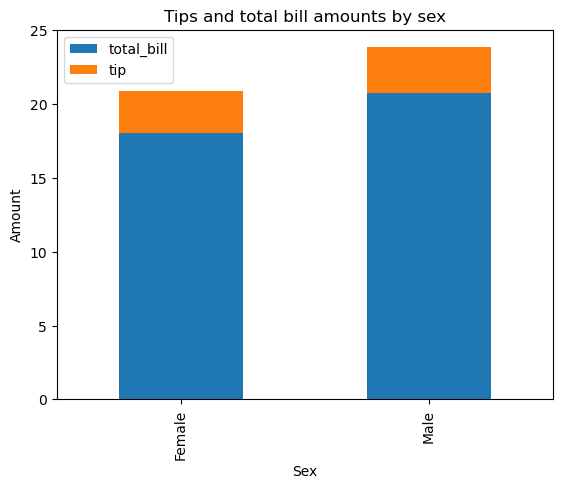

In [23]:
tip_amount_by_sex = tips_df.loc[:, ["sex", "total_bill", "tip"]].groupby("sex").mean().reset_index()

tips_by_sex_chart = tip_amount_by_sex.plot(kind="bar",
                                           x="sex",
                                           y=["total_bill", "tip"],
                                           stacked=True,
                                           xlabel="Sex",
                                           ylabel="Amount",
                                           title="Tips and total bill amounts by sex")

## Are the best tips on Saturday night?

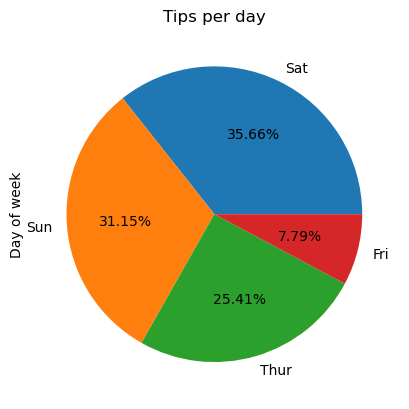

In [24]:
daily_tips = tips_df['day'].value_counts()

daily_tips_chart = daily_tips.plot(kind="pie",
                                   label="Day of week",
                                   title="Tips per day",
                                   autopct='%1.2f%%')

Total bill and Tips per day of the week?

In [25]:
from pandas.api.types import CategoricalDtype

day_of_week_order = CategoricalDtype(
    ['Thur', 'Fri', 'Sat', 'Sun'],
    ordered=True
)

tips_df['day'] = tips_df['day'].astype(day_of_week_order)

In [26]:
daily_mean=tips_df.loc[:,["day","total_bill","tip"]].groupby("day").mean().reset_index()
daily_mean

C:\Users\seldabayman\AppData\Local\Temp\ipykernel_5632\4051937379.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_mean=tips_df.loc[:,["day","total_bill","tip"]].groupby("day").mean().reset_index()


,day,total_bill,tip
0,Thur,17.682742,2.771452
1,Fri,17.151579,2.734737
2,Sat,20.441379,2.993103
3,Sun,21.410000,3.255132


C:\Users\seldabayman\AppData\Local\Temp\ipykernel_5632\3832591195.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_mean = tips_df.loc[:, ["day", "total_bill", "tip"]].groupby("day").mean().reset_index()


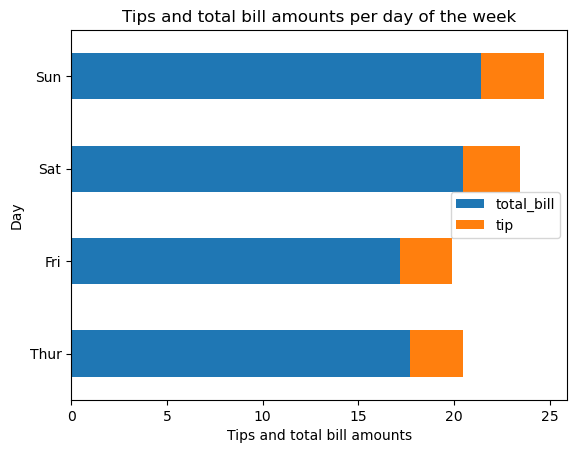

In [27]:
daily_mean = tips_df.loc[:, ["day", "total_bill", "tip"]].groupby("day").mean().reset_index()

tips_by_day_chart = daily_mean.plot(kind="barh",
                                    x="day",
                                    y=["total_bill", "tip"],
                                    stacked=True,
                                    xlabel="Tips and total bill amounts",
                                    ylabel="Day",
                                    title="Tips and total bill amounts per day of the week")

Are there better tips during the day or at night?

In [28]:
dinner_lunch_df=tips_df.loc[:,["time","total_bill","tip"]].groupby("time").mean(numeric_only=True).reset_index()
dinner_lunch_df

,time,total_bill,tip
0,Dinner,20.797159,3.102670
1,Lunch,17.168676,2.728088


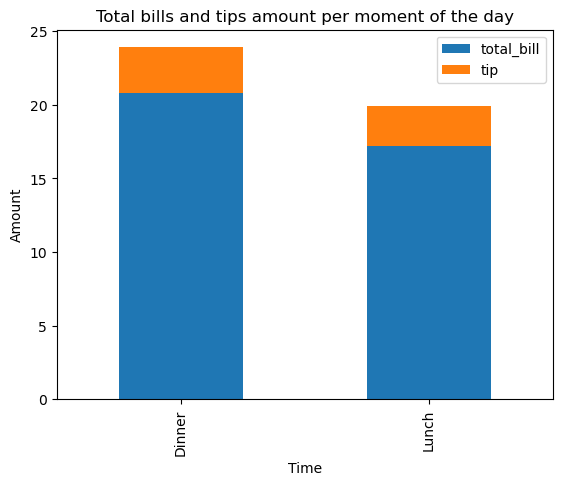

In [29]:
dinner_lunch_df=tips_df.loc[:,["time","total_bill","tip"]].groupby("time").mean(numeric_only=True).reset_index()

dinner_lunch_chart= dinner_lunch_df.plot(kind="bar",
                                        x="time",
                                        y=["total_bill","tip"],
                                         stacked=True,
                                         xlabel="Time",
                                         ylabel="Amount",
                                         title="Total bills and tips amount per moment of the day")